In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
import scipy as sio 

2023-07-07 10:20:28.143452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data = sio.io.loadmat('data/bretigny_seg.mat')

In [10]:
height, length = data['HH'].shape

In [16]:
img = np.zeros((height, length,3), dtype= np.complex128)

In [17]:
for i in range(height) :
    for j in range(length) :
        img[i,j] = [data['HH'][i,j], data['HV'][i,j], data["VV"][i,j]]

In [35]:
img[:3,:3]@np.ones((3,1))

array([[[-0.31967118-0.06111267j],
        [-0.22184855-0.03938631j],
        [ 0.05127944-0.07868176j]],

       [[ 0.12070337-0.10440514j],
        [-0.02185535-0.01050185j],
        [-0.11505196+0.0253333j ]],

       [[ 0.20868319-0.03267166j],
        [ 0.13565296+0.08280683j],
        [-0.02224059+0.13393377j]]])

In [36]:
#filter working as a grid adding all the given pixel
#basicall convolution over the whole image keeping the dimension of the original image
#Conclusion : filtrage par moyenne très mauvais pour ce qui est des zones à fortes variations comme peuvent l'être les centres urbains.

def apply_average_filter(img, kernel_size):
    filter = np.ones(kernel_size)
    filtered_img = np.zeros(img.shape, dtype = np.complex128)
    height, length, dim = img.shape
    k_height, k_length = kernel_size[0], kernel_size[1]

    augmented_img = np.zeros((height+k_height-1, length + k_length-1,dim),dtype=np.complex128)
    augmented_img[k_height - 1:, k_length - 1 :] = img

    for i in range(height) :
        for j in range(length) :
            #suming for each component of the img
            filtered_img[i,j,0] = np.ones((1,k_height))@augmented_img[i:k_height+i,j:k_length + j,0]@np.ones((k_length,1))
            filtered_img[i,j,1] = np.ones((1,k_height))@augmented_img[i:k_height+i,j:k_length + j,1]@np.ones((k_length,1))
            filtered_img[i,j,2] = np.ones((1,k_height))@augmented_img[i:k_height+i,j:k_length + j,2]@np.ones((k_length,1))

    return filtered_img
filtered_img = apply_average_filter(img,(3,3))

In [52]:
pauli_base = 1/np.sqrt(2)*np.array([[1,0,-1],[0,2,0],[1,0,1]])
def rough_to_pauli(img) :
    height, length, dim = img.shape
    pauli_rough = np.zeros(img.shape,dtype = np.complex128)
    for i in range(height) :
        for j in range(length) :
            pauli_rough[i,j] = pauli_base@img[i,j]
    return pauli_rough
pauli_rough = rough_to_pauli(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


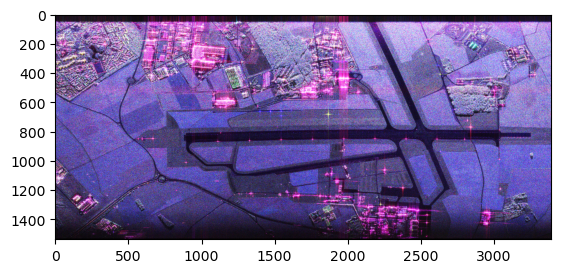

In [53]:
plt.imshow(abs(pauli_rough))

In [44]:
plt.imshow(pauli_rough)

array([[1.41421356],
       [0.        ],
       [1.41421356]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


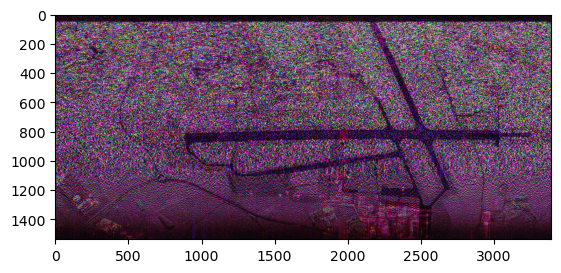

In [37]:
plt.imshow(np.real(filtered_img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


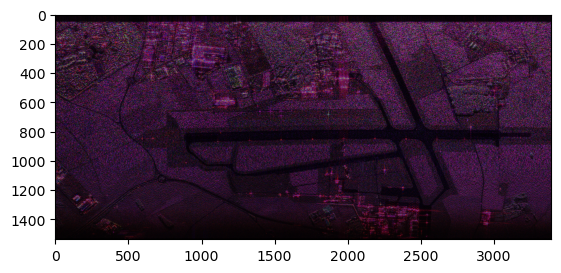

In [39]:
plt.imshow(np.real(img))

In [ ]:
#Code implementing article 10.1109/JSTARS.2017.2743338
def key_pixel_selection(img) :
    height, length = img.shape
    tmp_im = img[1 : -1][1 : -1]
    grad_img = [[[0,0]]*(length-2)]*(height-2)
    for i in range(height - 2):
        for j in range(length - 2) :
            grad_img[i,j][0] = (img[i+2,j+1] - img[i,j+1])/2
            grad_img[i,j][1] = (img[i+1,j+2] - img[i+1,j])/2
    
    return key_pixes, non_key